In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
from scipy import stats

カーネル密度関数に関する説明
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

(0.0, 1.0)

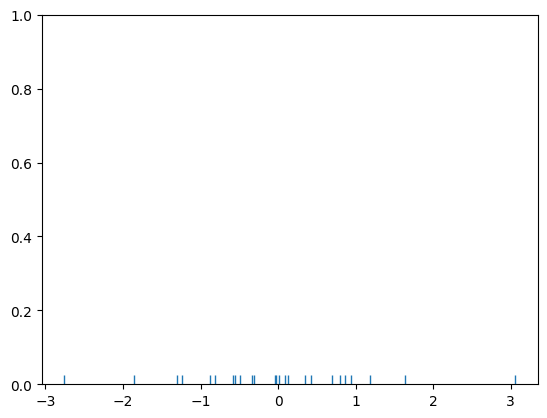

In [24]:
dataset = randn(25)

# rugplotを書きます
sns.rugplot(dataset)
plt.ylim(0, 1)

<Axes: >

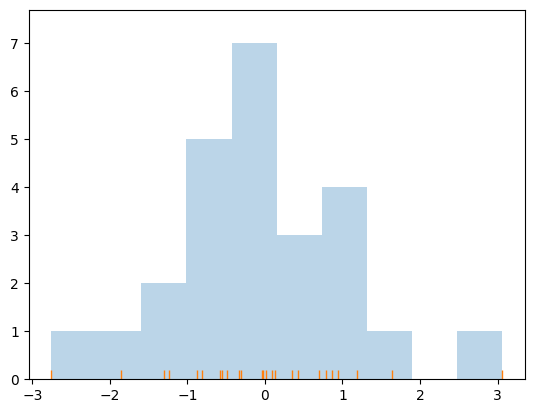

In [25]:
# ヒストグラムを重ねます。
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

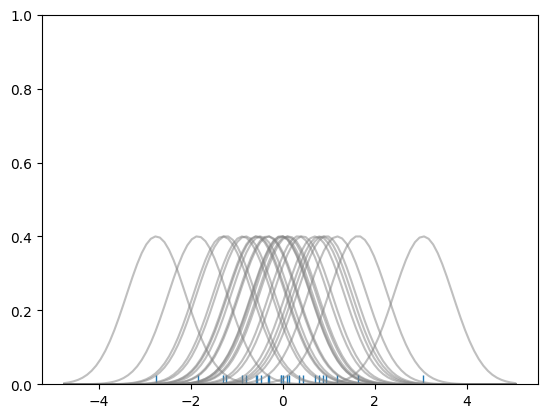

In [26]:
# バンド幅の推定
# http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

sns.rugplot(dataset)

# X軸を設定
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color="grey", alpha=0.5)

plt.ylim(0, 1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

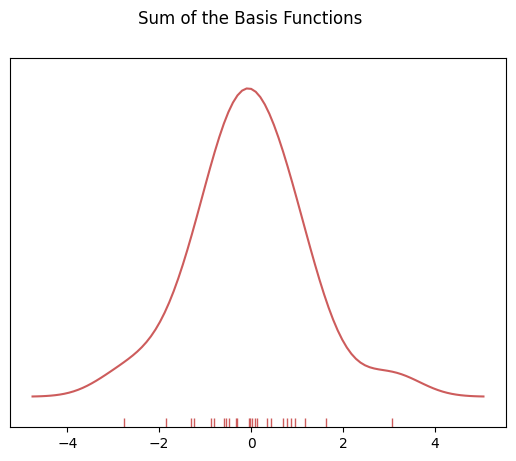

In [27]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color="indianred")
sns.rugplot(dataset, c="indianred")
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

<Axes: ylabel='Density'>

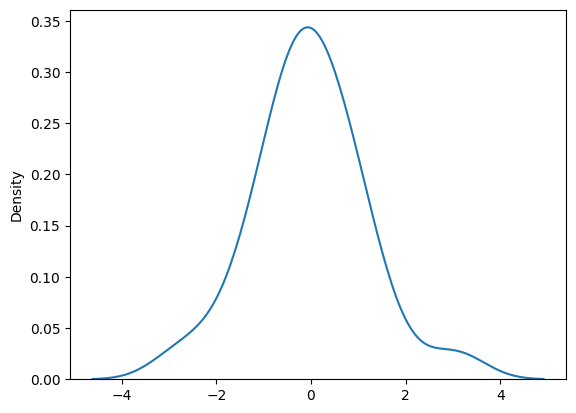

In [28]:
# これが1行で出来ます。

sns.kdeplot(dataset)

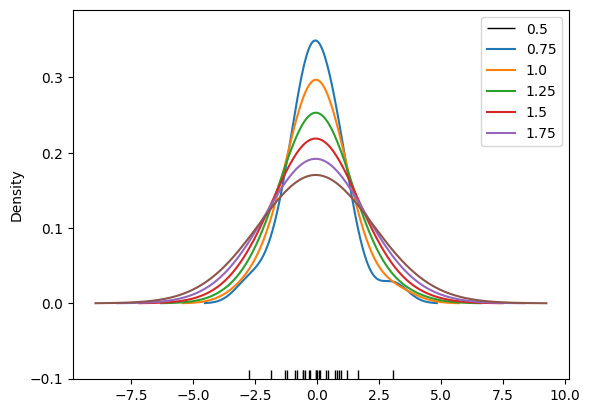

In [29]:
sns.rugplot(dataset, color="black")

# バンド幅を変更
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw_method=bw)

plt.legend(np.arange(0.5, 2, 0.25))

<Axes: xlabel='Density'>

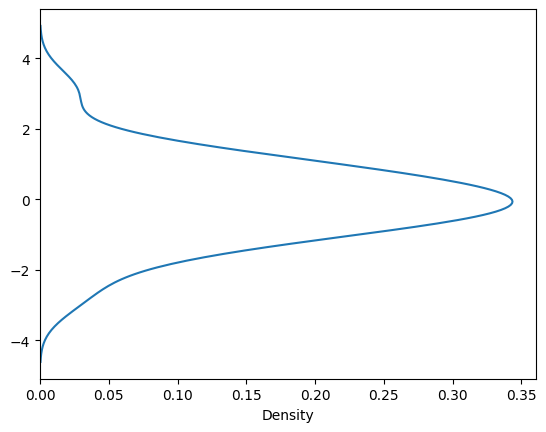

In [30]:
# 軸を入れ替えることもできます。
sns.kdeplot(y=dataset)

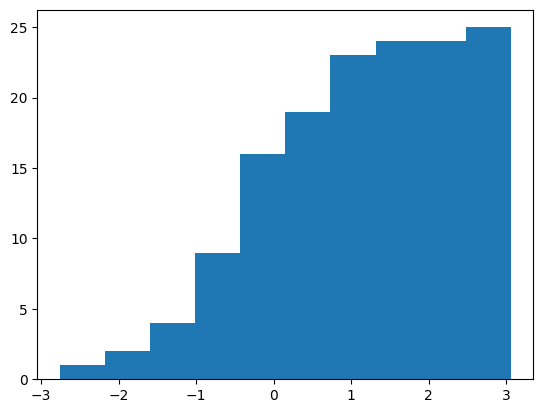

In [31]:
# cumulative distribution function (CDF)
# 累積分布関数
# http://en.wikipedia.org/wiki/Cumulative_distribution_function

_ = plt.hist(dataset, cumulative=True)

<Axes: ylabel='Density'>

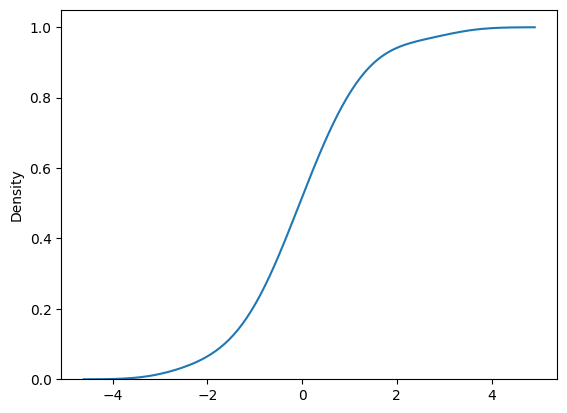

In [32]:
sns.kdeplot(dataset, cumulative=True)

<Axes: xlabel='X', ylabel='Y'>

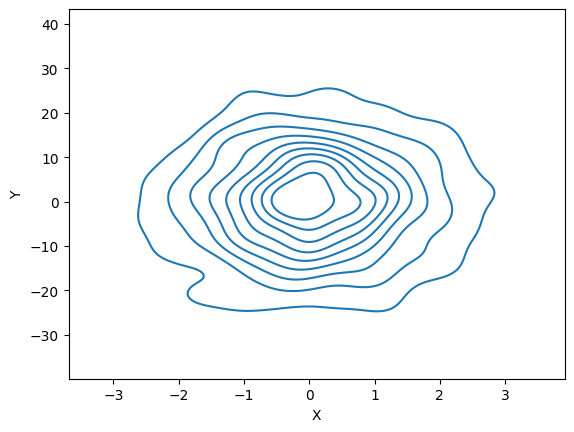

In [33]:
# 2次元平面上の中心
mean = [0, 0]
# それぞれの分散を決めます。
cov = [[1, 0], [0, 100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2, columns=["X", "Y"])
# プロットします。SeabornとPandasの相性は抜群
#　ｘとｙを具体的に指定するように変更されました。
sns.kdeplot(data=dframe, x='X', y='Y')

<Axes: xlabel='X', ylabel='Y'>

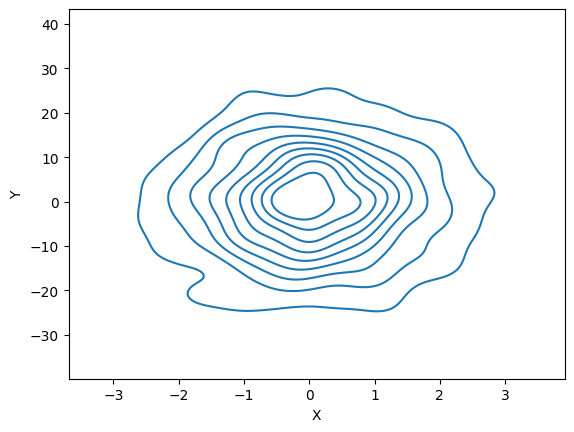

In [34]:
# 軸ごとにデータをわたせます。
sns.kdeplot(x=dframe.X, y=dframe.Y)

<Axes: xlabel='X', ylabel='Y'>

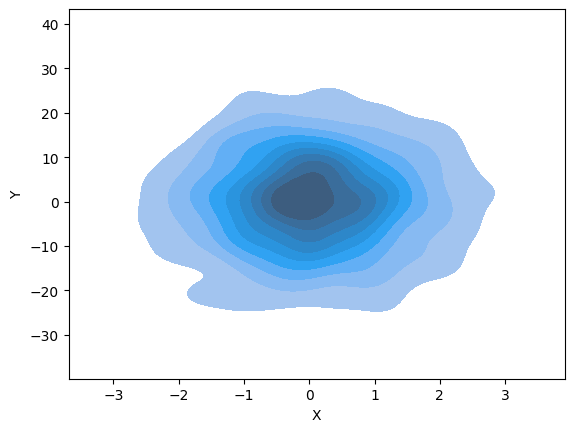

In [35]:
# 描画方法を変更できます。
sns.kdeplot(x=dframe.X, y=dframe.Y, fill=True)

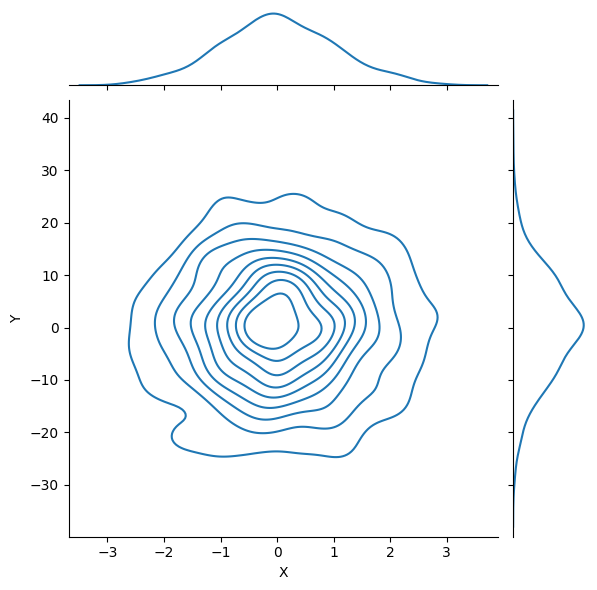

In [36]:
# 同時分布の推定も可能です。
sns.jointplot(data=dframe, x='X', y='Y', kind="kde")